<div style="color:Orange;font-size:30px" align="center" >Classify Employees who are likely to leave the company</div>

***

### Task1

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,precision_score ,f1_score ,recall_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [200]:
df=pd.read_csv("DS2_C5_S4_HR_Data_Challenge.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [201]:
#target variable is "left"

In [202]:
df.shape

(14999, 10)

In [203]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [204]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


> Impact of salary on employee retention and Department wise employee retention rate

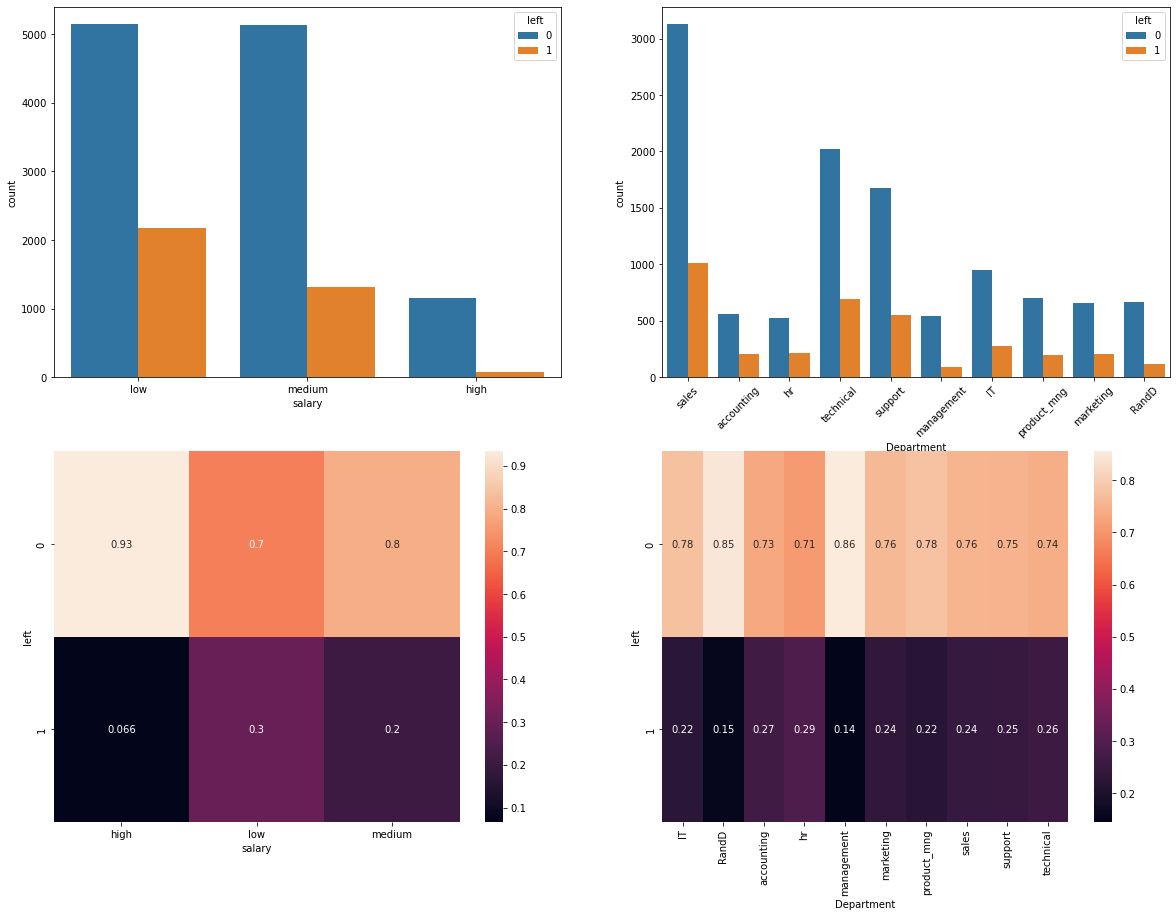

In [206]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sb.countplot(data=df,x="salary",hue="left")
plt.subplot(222)
sb.countplot(data=df,x="Department",hue="left")
plt.xticks(rotation=45)
plt.subplot(223)
sb.heatmap(pd.crosstab(index=df["left"],columns=df["salary"],normalize='columns'),annot=True)
plt.subplot(224)
sb.heatmap(pd.crosstab(index=df["left"],columns=df["Department"],normalize='columns'),annot=True)
plt.show()

- out of left employees Low salaried employees are more in numbers
- out of left employees sales department employees are more in numers
- high salaries ones have lower attrition rate
- RandD and management have lower attrition rate

***

### *Task2*

> Data Preprocessing

In [207]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [208]:
#there are no null values

In [209]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [210]:
df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [211]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [212]:
#no noise values in data set

In [213]:
#label encoding

In [214]:
l=df.select_dtypes(include="object")
for i in l:
    df[i]=df[i].astype('category')
for i in l:
    df[i]=LabelEncoder().fit_transform(df[i])

<AxesSubplot:>

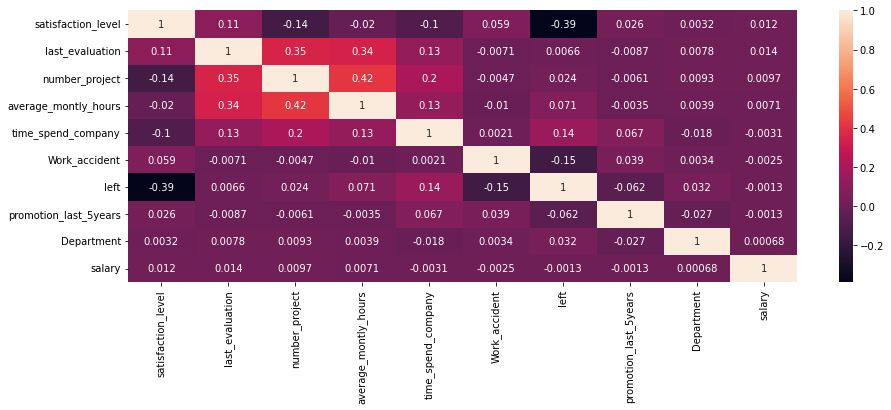

In [215]:
#Correlation matrix
plt.figure(figsize=(15,5))
sb.heatmap(df.corr(),annot=True)

Top features based on correlation wrt target variable "left" are
- satisfaction level
- work accident
- time spend company


In [216]:
#feature scaling using standard scaler

In [217]:
c=df.columns
c

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [218]:
#considering all the columns for our model after many trials
x=df.loc[:,c!="left"]
y=df["left"]

In [219]:
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [220]:
#train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

### Task3

- Naive Bayes Classification

In [221]:
model=GaussianNB().fit(x_train,y_train)

In [222]:
#training accuracy
model.score(x_train,y_train)

0.798837984569959

In [223]:
#test accuracy
model.score(x_test,y_test)

0.796

In [224]:
y_pred=model.predict(x_test)

In [225]:
#y actual vs predicted as per gaussian naive bayes algo
df_y1=pd.DataFrame({"actual":y_test,'predicted':y_pred})
df_y1.head()

,actual,predicted
2463,0,0
6579,0,0
9578,0,1
8174,0,0
20,1,1


In [226]:
#Satistaction level is most important factor for people leaving the company

### Task4

- Decision Tree

In [227]:
model2=DecisionTreeClassifier().fit(x_train,y_train)

In [228]:
#train accuracy
model2.score(x_train,y_train)

1.0

In [229]:
#test accuracy
model2.score(x_test,y_test)

0.9813333333333333

In [230]:
y_pred2=model2.predict(x_test)

In [231]:
#y actual vs predicted as per decision tree
df_y2=pd.DataFrame({"actual":y_test,'predicted':y_pred})
df_y2.head()

,actual,predicted
2463,0,0
6579,0,0
9578,0,1
8174,0,0
20,1,1


### Task5

- Evaluation Metrics and comparing both models

In [236]:
#confusion matrix of naive bayes model
confusion_matrix(y_test,y_pred)

array([[2795,  619],
       [ 299,  787]], dtype=int64)

In [237]:
#confusion matrix of decision tree classifier
confusion_matrix(y_test,y_pred2)

array([[3360,   54],
       [  30, 1056]], dtype=int64)

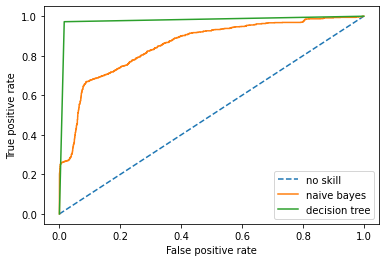

In [242]:
#visualizing  the roc curve
ns_prob=[0 for i in range(len(y_test))]
nb_prob=model.predict_proba(x_test)[:,1]
dt_prob=model2.predict_proba(x_test)[:,1]

ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
nb_fpr,nb_tpr,_=roc_curve(y_test,nb_prob)
dt_fpr,dt_tpr,_=roc_curve(y_test,dt_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label="no skill")
plt.plot(nb_fpr,nb_tpr,label="naive bayes")
plt.plot(dt_fpr,dt_tpr,label="decision tree")

plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [243]:
#area under curve for naive bayes model 
roc_auc_score(y_test,y_pred)

0.771682736344011

In [244]:
#roc auc for decision tree model
roc_auc_score(y_test,y_pred2)

0.9782792337045704

In [ ]:
#area under curve for decision tree classifier is very high almost equal to 1. so it is easily the best model for our data features

In [234]:
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred,average="weighted")
r=recall_score(y_test,y_pred,average="weighted")
f=f1_score(y_test,y_pred,average="weighted")
a2=accuracy_score(y_test,y_pred2)
p2=precision_score(y_test,y_pred2,average="weighted")
r2=recall_score(y_test,y_pred2,average="weighted")
f2=f1_score(y_test,y_pred2,average="weighted")
metrics=pd.DataFrame({"Guassian Naive Bayes":[a,p,r,f],"Decision Tree":[a2,p2,r2,f2]},index=["Accuracy","Precision","Recall","F1 Score"])
metrics

,Guassian Naive Bayes,Decision Tree
Accuracy,0.796000,0.981333
Precision,0.820435,0.981546
Recall,0.796000,0.981333
F1 Score,0.804083,0.981402


In [ ]:
#Best model for HR to help them in retaining employees is the Decision tree model with accuracy of almost 98%